In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import feature_process_helper
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

### Random Forest 1

#### Load data

In [6]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [7]:
y_train = pd.read_csv('y_train.csv')
del y_train['id']

#### Construct dataset

In [8]:
X_train, X_test = feature_process_helper.dates(X_train, X_test)
X_train, X_test = feature_process_helper.construction(X_train, X_test)
X_train, X_test = feature_process_helper.bools(X_train, X_test)
X_train, X_test = feature_process_helper.locs(X_train, X_test)
X_train, X_test = feature_process_helper.removal(X_train, X_test)
X_train, X_test = feature_process_helper.dummies(X_train, X_test)

#### Tune parameters

In [11]:
rf = RandomForestClassifier(n_estimators=50,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

Find the right information gain criterion.

In [13]:
param_grid = { "criterion"   : ["gini", "entropy"],}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train.values.ravel())
#scores = cross_val_score(gs, X_train, y_train.values.ravel(), scoring='accuracy', cv=5)
#print('CV accuracy: %.4f +/- %.4f' % (np.mean(scores), np.std(scores)))

In [14]:
print(gs.best_score_)

0.794191919192


In [15]:
print(gs.best_params_)

{'criterion': 'gini'}


In [17]:
print(gs.grid_scores_)

[mean: 0.79419, std: 0.00238, params: {'criterion': 'gini'}, mean: 0.79306, std: 0.00159, params: {'criterion': 'entropy'}]


C:\Users\User\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Find the right number of minimum samples to split.

In [18]:
param_grid = { "min_samples_split" : [2, 4, 10]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train.values.ravel())
#scores = cross_val_score(gs, X_train, y_train.values.ravel(), scoring='accuracy', cv=5)
#print('CV accuracy: %.4f +/- %.4f' % (np.mean(scores), np.std(scores)))

In [19]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.grid_scores_)

0.799494949495
{'min_samples_split': 10}
[mean: 0.79419, std: 0.00238, params: {'min_samples_split': 2}, mean: 0.79872, std: 0.00196, params: {'min_samples_split': 4}, mean: 0.79949, std: 0.00139, params: {'min_samples_split': 10}]


C:\Users\User\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Find the right number of minimum samples in a leaf.

In [22]:
rf = RandomForestClassifier(criterion='gini',
                            min_samples_split=10,
                            n_estimators=50,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

In [23]:
param_grid = {"min_samples_leaf" : [1,5,10]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train.values.ravel())
#scores = cross_val_score(gs, X_train, y_train.values.ravel(), scoring='accuracy', cv=5)
#print('CV accuracy: %.4f +/- %.4f' % (np.mean(scores), np.std(scores)))

In [24]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.grid_scores_)

0.799494949495
{'min_samples_leaf': 1}
[mean: 0.79949, std: 0.00139, params: {'min_samples_leaf': 1}, mean: 0.75559, std: 0.00112, params: {'min_samples_leaf': 5}, mean: 0.73729, std: 0.00270, params: {'min_samples_leaf': 10}]


C:\Users\User\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [25]:
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=50,
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)

In [26]:
param_grid = {"min_samples_split" : [10, 12, 16]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train.values.ravel())
#scores = cross_val_score(gs, X_train, y_train.values.ravel(), scoring='accuracy', cv=5)
#print('CV accuracy: %.4f +/- %.4f' % (np.mean(scores), np.std(scores)))

In [27]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.grid_scores_)

0.8
{'min_samples_split': 12}
[mean: 0.79949, std: 0.00139, params: {'min_samples_split': 10}, mean: 0.80000, std: 0.00024, params: {'min_samples_split': 12}, mean: 0.79759, std: 0.00066, params: {'min_samples_split': 16}]


C:\Users\User\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


#### Run model with 1000 trees

In [15]:
rf = RandomForestClassifier(criterion='entropy',
                                n_estimators=1000,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf = rf.fit(X_train, y_train.values.ravel())
print "%.4f" % rf.oob_score_ 

0.8092


In [22]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,longitude,0.094178
3,latitude,0.093220
1,gps_height,0.060972
6,population,0.045696
0,date_recorded,0.042870
3731,quantity_group_dry,0.041938
9,construction_year,0.033380
3729,quantity_group_enough,0.023267
3750,waterpoint_type_other,0.014815
11,month_recorded,0.014388


#### Generate submission file

In [16]:
predictions = rf.predict(X_test)
y_test = pd.read_csv('y_test.csv')
pred = pd.DataFrame(predictions, columns = [y_test.columns[1]])
del y_test['status_group']
y_test = pd.concat((y_test, pred), axis = 1)
y_test.to_csv('y_test1.csv', sep=",", index = False)

#### Run model with 500 trees

In [17]:
rf2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf2 = rf2.fit(X_train, y_train.values.ravel())
print "%.4f" % rf2.oob_score_ 

0.8088


#### Run model with 500 trees & 'funder' deleted

In [27]:
rf2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf2 = rf2.fit(X_train, y_train.values.ravel())
print "%.4f" % rf2.oob_score_ 

0.8081


In [21]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,longitude,0.094282
3,latitude,0.093040
1,gps_height,0.060916
6,population,0.045731
0,date_recorded,0.042778
3731,quantity_group_dry,0.042771
9,construction_year,0.033192
3729,quantity_group_enough,0.023271
3750,waterpoint_type_other,0.014880
11,month_recorded,0.014480


#### Generate submission file

In [18]:
predictions = rf2.predict(X_test)
y_test = pd.read_csv('y_test.csv')
pred = pd.DataFrame(predictions, columns = [y_test.columns[1]])
del y_test['status_group']
y_test = pd.concat((y_test, pred), axis = 1)
y_test.to_csv('y_test2.csv', sep=",", index = False)

#### Run model with 500 trees & tuned hyperparameters

In [9]:
rf2 = RandomForestClassifier(criterion='gini',
                                min_samples_split=12,
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf2 = rf2.fit(X_train, y_train.values.ravel())
print "%.4f" % rf2.oob_score_ 

0.8142


In [15]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
3731,quantity_group_dry,0.069755
2,longitude,0.048945
3,latitude,0.047755
1,gps_height,0.035035
9,construction_year,0.032990
0,date_recorded,0.032718
3729,quantity_group_enough,0.030897
3750,waterpoint_type_other,0.026630
6,population,0.025845
3693,extraction_type_class_other,0.021139


#### Generate submission file

In [10]:
predictions = rf2.predict(X_test)
y_test = pd.read_csv('y_test.csv')
pred = pd.DataFrame(predictions, columns = [y_test.columns[1]])
del y_test['status_group']
y_test = pd.concat((y_test, pred), axis = 1)
y_test.to_csv('y_test3.csv', sep=",", index = False)

#### Run model with 500 trees, tuned hyperparameters, construction 2

In [12]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
del y_train['id']
X_train, X_test = feature_process_helper.dates(X_train, X_test)
X_train, X_test = feature_process_helper.construction2(X_train, X_test)
X_train, X_test = feature_process_helper.bools(X_train, X_test)
X_train, X_test = feature_process_helper.locs(X_train, X_test)
X_train, X_test = feature_process_helper.removal(X_train, X_test)
X_train, X_test = feature_process_helper.dummies(X_train, X_test)

In [13]:
rf4 = RandomForestClassifier(criterion='gini',
                                min_samples_split=12,
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf4 = rf4.fit(X_train, y_train.values.ravel())
print "%.4f" % rf4.oob_score_ 

0.8151


In [16]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf2.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
3731,quantity_group_dry,0.069755
2,longitude,0.048945
3,latitude,0.047755
1,gps_height,0.035035
9,construction_year,0.032990
0,date_recorded,0.032718
3729,quantity_group_enough,0.030897
3750,waterpoint_type_other,0.026630
6,population,0.025845
3693,extraction_type_class_other,0.021139


#### Generate submission file

In [14]:
predictions = rf4.predict(X_test)
y_test = pd.read_csv('y_test.csv')
pred = pd.DataFrame(predictions, columns = [y_test.columns[1]])
del y_test['status_group']
y_test = pd.concat((y_test, pred), axis = 1)
y_test.to_csv('y_test4.csv', sep=",", index = False)

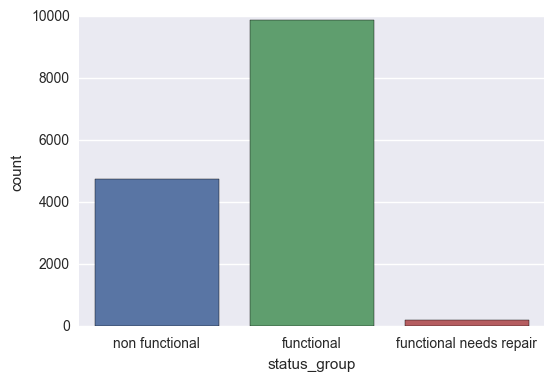

In [18]:
import seaborn as sns
%matplotlib inline

sns.countplot(y_test['status_group'])